<a href="https://colab.research.google.com/github/ZKellock/MAT421/blob/main/MAT421ModuleH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**22.4 - Numerical Error and Instability**
*   Approximations of solutions are only useful if they fall within a certain allowed range of error
*   Accuracy: A scheme's ability to get close to the exact solution as a function of the step size h
*   Stability: A scheme's ability to keep the error from growing as it integrates further in time. A scheme can only be considered stable if the error does not grow

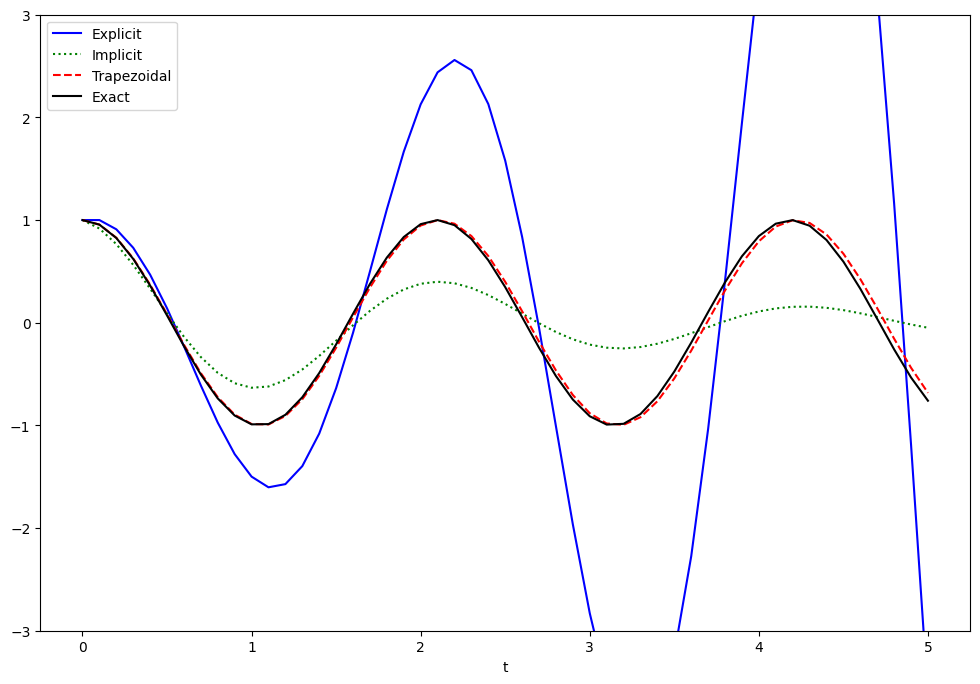

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

h = 0.1
t = np.arange(0, 5.1, h)
w = 3

s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')  ; plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--') ; plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3]) ; plt.xlabel('t') ; plt.ylabel('')
plt.legend(['Explicit', 'Implicit', 'Trapezoidal', 'Exact'])
plt.show()

**22.5 - Predictor-Corrector and Runge Kutta Methods**
*   A Predictor Corrector Method is a method of improving the appoximation accuracy by querying the F function several times at different locations and then using a weight average of the results to update the state
*   A predictor is an explicit formula that estimates a solution
*   A corrector is used after the solution is obtained, and can be applied to improve accuracy
*   The Runge Kutta method is one popular method of solving an ODE. RK methods are based on Taylor series to get close to the exact solution without $S^n$ iterations. They can be computed with several orders and produce more accurate results

**22.6 Python ODE Solvers**

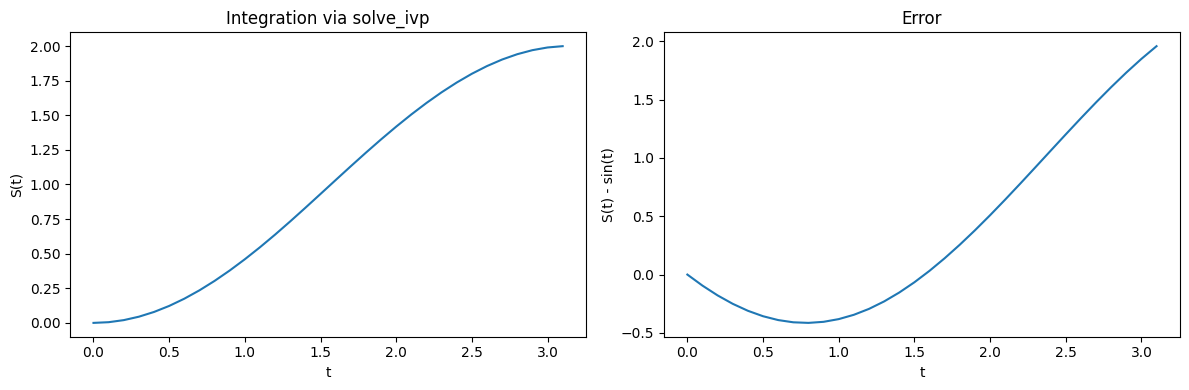

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

F = lambda t, s: np.sin(t)
t_eval = np.arange(0, np.pi, 0.1)

sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
p_sln = plt.subplot(121)
p_sln.set_title("Integration via solve_ivp")
plt.plot(sol.t, sol.y[0])
plt.xlabel('t') ; plt.ylabel('S(t)')

p_error = plt.subplot(122)
p_error.set_title("Error")
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t') ; plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()